# Practical 7: DIPA
# Devasy Patel
# 20BCE057


## Aim: Implement the following
- Median Filter
- Max Filter
- Min Filter
- Mean Filter
- Harmonic Mean Filter
- Contraharmonic Mean Filter
- Adaptive Median Filter


In [1]:
# load image as grayscale
import cv2
img = cv2.imread('images_woods\\fig5.08(b).jpg',0)

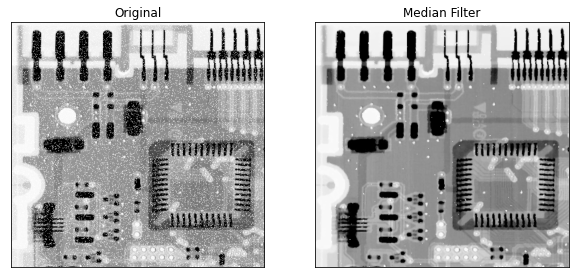

In [3]:
# apply median filter
from matplotlib import pyplot as plt
img_median = cv2.medianBlur(img,3)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_median,cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
# Manual implementation of median filter
import numpy as np

def median_filter(img, kernel_size):
    kai2 = kernel_size//2
    img_median = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            img_median[i,j] = np.median(img[i-kai2:i+kai2,j-kai2:j+kai2])
    return img_median


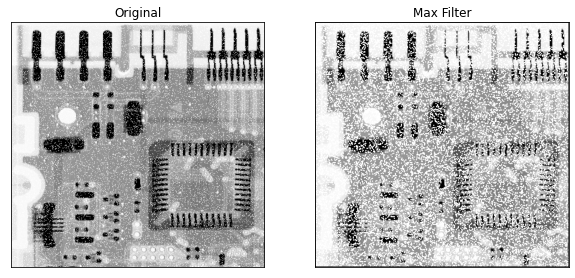

In [11]:
# Max filter
def max_filter(img, kernel_size):
    kai2 = kernel_size//2
    img_max = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            img_max[i][j] = np.max(img[i-kai2:i+kai2,j-kai2:j+kai2])
    return img_max

img_max = max_filter(img,3)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_max,cmap='gray'),plt.title('Max Filter')
plt.xticks([]), plt.yticks([])
plt.show()


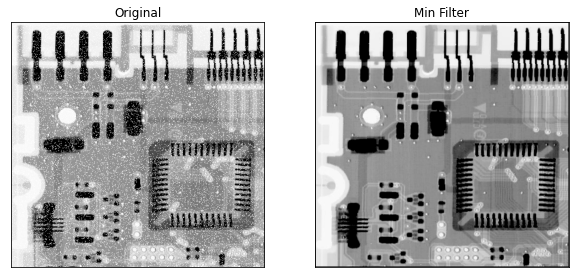

In [12]:
# Min filter
def min_filter(img, kernel_size):
    kai2 = kernel_size//2
    img_min = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            img_min[i][j] = np.min(img[i-kai2:i+kai2,j-kai2:j+kai2])
    return img_min
img_min = min_filter(img,3)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(img_min,cmap='gray'),plt.title('Min Filter')
plt.xticks([]), plt.yticks([])
plt.show()


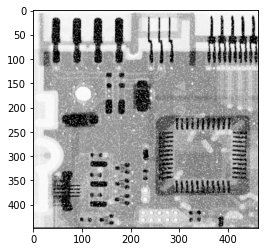

In [13]:
def mean_filter(img, kernel_size):
    kai2 = kernel_size//2
    img_mean = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            img_mean[i][j] = np.mean(img[i-kai2:i+kai2,j-kai2:j+kai2])
    return img_mean
img_mean = mean_filter(img,3)
plt.imshow(img_mean,cmap='gray')

In [18]:
array = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(1/(array+1))

[[0.5        0.33333333 0.25      ]
 [0.2        0.16666667 0.14285714]
 [0.125      0.11111111 0.1       ]]


![Alt text](image-2.png)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20736\317426744.py:12: RuntimeWarning: divide by zero encountered in divide
  img_harmonic_mean[i][j] = np.mean(1/sliced)**-1


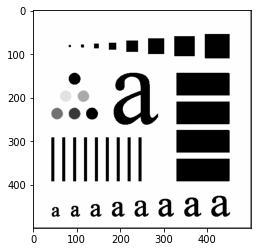

In [32]:
# Harmonic mean filter
img = cv2.imread('images_woods\\abcl.jpg',0)
def harmonic_mean_filter(img, kernel_size):
    kai2 = kernel_size//2
    img_harmonic_mean = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            sliced = img[i-kai2:i+kai2,j-kai2:j+kai2]
            # add 1 to avoid division by zero
            sliced = sliced+1
            
            img_harmonic_mean[i][j] = np.mean(1/sliced)**-1
    return img_harmonic_mean
img_harmonic_mean = harmonic_mean_filter(img,3)
plt.imshow(img_harmonic_mean,cmap='gray')

C:\Users\Owner\AppData\Local\Temp\ipykernel_20736\670637297.py:11: RuntimeWarning: invalid value encountered in double_scalars
  img_contraharmonic_mean[i][j] = np.mean(sliced**(Q+1))/np.mean(sliced**Q)


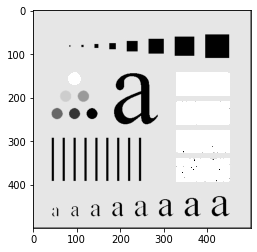

In [37]:
# contraharmonic mean filter
def contraharmonic_mean_filter(img, kernel_size, Q):
    kai2 = kernel_size//2
    img_contraharmonic_mean = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            sliced = img[i-kai2:i+kai2,j-kai2:j+kai2]
            # add 1 to avoid division by zero
            sliced = sliced+1
            
            img_contraharmonic_mean[i][j] = np.mean(sliced**(Q+1))/np.mean(sliced**Q)
    return img_contraharmonic_mean

img_contraharmonic_mean = contraharmonic_mean_filter(img,3,1.5)
plt.imshow(img_contraharmonic_mean,cmap='gray')


# Adaptive Median Filter

In [40]:
f_max = 7
h, w = img.shape
g_adp = np.zeros((h,w))
for i in range(f_max//2, h-(f_max//2)):
    for j in range(f_max//2, w-(f_max//2)):
        smed = 0
        smax = 0
        smin = 0
        f_cur = 3
        while(f_cur <= f_max and (smed == smax or smed == smin)):
            l = f_cur//2
            ls=[]
            for x in range(-1*l , l):
                for y in range(-1*l, l):
                    ls.append(img[i+x][j+y])
            ls.sort()
            smed = ls[len(ls)//2]
            smax = max(ls)
            smin = min(ls)
            f_cur  = f_cur + 2
        if(img[i][j] == smax or img[i][j] == smin):
            g_adp[i][j] = smed
        else:
            g_adp[i][j] = img[i][j]

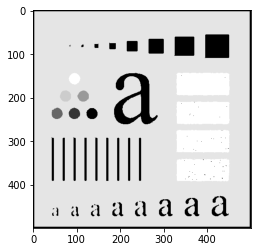

In [41]:
plt.imshow(g_adp,cmap='gray')

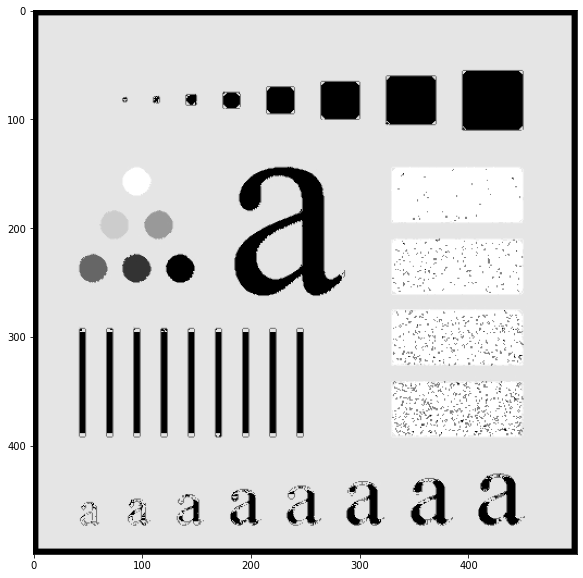

In [43]:
# for adaptive median filter
fmin = 3 # minimum window size
fmax = 11 # maximum window size

def adaptive_median_filter(img, fmin, fmax):
    img_adaptive_median = np.zeros(img.shape)
    for i in range(5,img.shape[0]-5):
        for j in range(5,img.shape[1]-5):
            smax = 0
            smin = 0
            smed = 0
            fcurr = 3
            while(fcurr <= fmax and (smed == smax or smed == smin)):
                l = fcurr//2
                ls = img[i-l:i+l,j-l:j+l]
                smax = np.max(ls)
                smin = np.min(ls)
                smed = np.median(ls)
                fcurr = fcurr + 2
            if img[i][j] == smax or img[i][j] == smin:
                img_adaptive_median[i][j] = smed
            else:
                img_adaptive_median[i][j] = img[i][j]
    return img_adaptive_median

img_adaptive_median = adaptive_median_filter(img, fmin, fmax)
plt.figure(figsize=(10,10))
plt.imshow(img_adaptive_median,cmap='gray')
    

# Conclusion: 
- After applying the median, max, min, and mean filters to the input image, we can see that each filter has its own unique effect on the image. The median filter is effective at removing salt-and-pepper noise, while the max filter is effective at highlighting the brightest parts of the image. The min filter is effective at highlighting the darkest parts of the image, while the mean filter is effective at smoothing out the image and reducing noise. Depending on the specific application, one filter may be more appropriate than the others. Overall, these filters are useful tools for image processing and can help improve the quality of images for further analysis.